In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import sys

path = os.getcwd()
os.chdir(path[:path.find("Estatística Básica")])
df = pd.read_csv(os.path.abspath("data/tabela2_1.csv"), sep=";", index_col="N")
df["Salario (x Sal Min)"] = df["Salario (x Sal Min)"].str.replace(",", ".").astype(float)


In [3]:
df.head()

,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
N,,,,,,,
1,solteiro,ensino fundamental,NaN,4.00,26,3,interior
2,casado,ensino fundamental,1.0,4.56,32,10,capital
3,casado,ensino fundamental,2.0,5.25,36,5,capital
4,solteiro,ensino médio,NaN,5.73,20,10,outra
5,solteiro,ensino fundamental,NaN,6.26,40,7,outra


# Análise Bidimensional

## Variáveis Qualitativas

In [4]:
df_pivot = pd.pivot_table(
    df[['Região de Procedência', 'Grau de Instrução']], 
    index="Região de Procedência",
    columns="Grau de Instrução", 
    aggfunc=lambda x: int(round(len(x) / len(df) * 100, 0)),
    margins=True,
    margins_name="Total",
)
df_pivot

Grau de Instrução,ensino fundamental,ensino médio,superior,Total
Região de Procedência,,,,
capital,11,14,6,31
interior,8,19,6,33
outra,14,17,6,36
Total,33,50,17,100


In [5]:
joint_df = (pd.crosstab(index=df["Região de Procedência"],
                       columns=df["Grau de Instrução"],
                       normalize="columns") * 100).round(0).astype(int)
joint_df.loc["Total"] = joint_df.sum()


<Axes: xlabel='Grau de Instrução'>

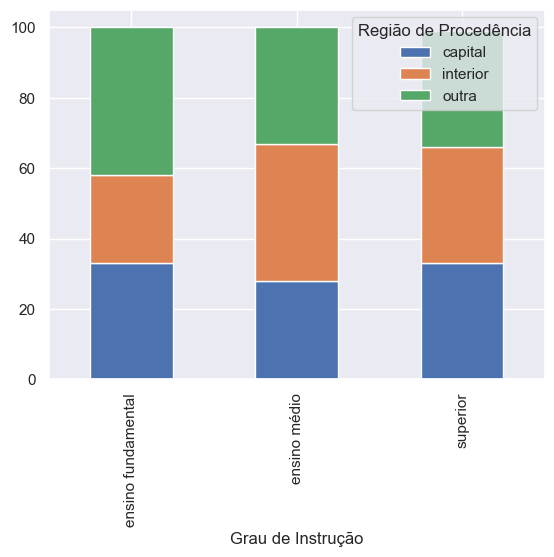

In [6]:
sns.set()
joint_df.iloc[:3].T.plot(kind='bar', stacked=True)


In [141]:
states = ["São Paulo", "Paraná", "Rio Grande do Sul"]
customers = [214, 51, 111]
products = [237, 102, 304]
school = [78, 126, 139]
others = [119, 22, 48]

df = pd.DataFrame(
    {
        "Estados": states,
        "Consumidor": customers,
        "Produtor": products,
        "Escola": school,
        "Outros": others
    }
)
df = df.set_index("Estados")
df_with_total = df.copy()
df_with_total.loc["Total"] = df_with_total.sum()
df_with_total["Total"] = df_with_total.sum(axis=1)

In [169]:
df

,Consumidor,Produtor,Escola,Outros
Estados,,,,
São Paulo,214,237,78,119
Paraná,51,102,126,22
Rio Grande do Sul,111,304,139,48


In [197]:
(df_with_total.loc["Total", "Consumidor"] / df_with_total.loc["Total", "Total"]) * df_with_total.loc["São Paulo", "Total"]

157.0909090909091

In [170]:
df_percents = (df_with_total.div(df_with_total["Total"], axis=0) * 100)
df_percents = df_percents.round(2)
df_percents

,Consumidor,Produtor,Escola,Outros,Total
Estados,,,,,
São Paulo,33.02,36.57,12.04,18.36,100.0
Paraná,16.94,33.89,41.86,7.31,100.0
Rio Grande do Sul,18.44,50.50,23.09,7.97,100.0
Total,24.24,41.46,22.11,12.19,100.0


In [171]:
df_espected = pd.DataFrame(
    {
        "Estados": states,
        "Consumidor": list(((df_percents.loc["Total", "Consumidor"] / 100) * df_with_total.loc[:, "Total"]).values)[:len(states)],
        "Produtor": list(((df_percents.loc["Total", "Produtor"] / 100) * df_with_total.loc[:, "Total"]).values)[:len(states)],
        "Escola": list(((df_percents.loc["Total", "Escola"] / 100) * df_with_total.loc[:, "Total"]).values)[:len(states)],
        "Outros": list(((df_percents.loc["Total", "Outros"] / 100) * df_with_total.loc[:, "Total"]).values)[:len(states)],
    }
)
df_espected = df_espected.set_index("Estados")
df_espected = df_espected.round(0).astype(int)
df_espected

,Consumidor,Produtor,Escola,Outros
Estados,,,,
São Paulo,157,269,143,79
Paraná,73,125,67,37
Rio Grande do Sul,146,250,133,73


In [172]:
df_desv = (df - df_espected).round(0).astype(int)
df_desv

,Consumidor,Produtor,Escola,Outros
Estados,,,,
São Paulo,57,-32,-65,40
Paraná,-22,-23,59,-15
Rio Grande do Sul,-35,54,6,-25


$$ \frac{(o_i - e_i)^2}{e_i} $$

In [173]:
sao_paulo_escole_qui_quadrado = ((df.loc["São Paulo", "Escola"] - df_espected.loc["São Paulo", "Escola"]) ** 2) / df_espected.loc["São Paulo", "Escola"]
sao_paulo_escole_qui_quadrado

29.545454545454547

In [174]:
qui_quadrado = ((df - df_espected) ** 2 / df_espected).sum().sum()
qui_quadrado

172.0847515023836

$$ \chi^2 = \sum_{i=1}^r \sum_{j=1}^s \frac{(n_{ij}-n_{ij}^*)^2}{n_{ij}^*} $$

Coeficiente de Contingência

$$ C = \sqrt{\frac{\chi^2}{\chi^2 + n}} $$

In [181]:
sqrt(qui_quadrado) ** 2

172.08475150238357

In [186]:
from math import sqrt
c = sqrt(qui_quadrado / (qui_quadrado + 4))
c

0.9885765858828574

$$ T = \sqrt{\frac{\chi^2}{n\sqrt{(r-1)(s-1)}}} $$

In [124]:
((450 - (665 * 0.584)) ** 2) / (665 * 0.584)

9.783421567617689

In [195]:
27 / 50

0.54

In [198]:
37 * 0.54

19.98

In [200]:
24 - 19.98

4.02

In [201]:
(24 - 19.98)**2

16.160399999999996

In [203]:
((24 - 19.98)**2) / (37 * 0.54)

0.8088288288288286

In [204]:
0.809 + 2.302 + 0.949 + 2.702

6.7620000000000005

In [210]:
sqrt(((171.76)**2) / ((171.76**2) + 4))

0.9999322137245171

In [209]:
sqrt(3)

1.7320508075688772